This notebook is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/).

Author: 蘇嘉冠 feabries@gmail.com

Contributors: 蘇郁翔 asdfghjkl225836@gmail.com

# Python 基礎練習（三）

## 在開始之前

請先確認以下動作已經完成：
1. 登錄你的 Google 帳號
2. （之前做過的可以跳過這步驟）按上面工具列的 `工具` -> `設定` 跳出設定視窗，按左邊的 `編輯器`，將右方的 `縮排寬度` 設定為 `4`，再按下 `儲存`
3. 按上方工具列的 `檔案` -> `在雲端硬碟中儲存副本`，會跳出一個新視窗，用複製的那一份繼續做編輯。複製的檔案會儲存在你的 [Google Drive](https://drive.google.com/drive) 的 `Colab Notebooks` 資料夾裡

## I. 函式（function）

有時候你可能會遇到一種情況：不斷的重複寫類似的程式碼（範例一）。這種時候，你可以將重複的程式碼包裝成一個函式（function），重複呼叫使用（範例二）

In [ ]:
weights = [67, 89, 72]
heights = [170, 155, 167]

print(weights[0] / (heights[0] / 100) ** 2)
print(weights[1] / (heights[1] / 100) ** 2)
print(weights[2] / (heights[2] / 100) ** 2)

In [ ]:
def get_bmi(weight, height):
    return weight / (height / 100) ** 2

weights = [67, 89, 72]
heights = [170, 155, 167]

print(get_bmi(weights[0], heights[0]))
print(get_bmi(weights[1], heights[1]))
print(get_bmi(weights[2], heights[2]))

定義一個函式的語法如下，其中參數為非必要。如果需要的話，還可以用 `return` 來回傳結果

```
def 函式名稱(參數1, 參數2, ...):
    ……………………
    程式區塊
    ……………………
```

### return

return 可以寫在一個函式裡的任何地方，return 那行被執行時，函式就會結束並且回傳結果

In [ ]:
def get_double_or_triple(number):
    if number % 2 == 0:
        return 2 * number
    return 3 * number

print(get_double_or_triple(4)) # 8 (2 * 4)
print(get_double_or_triple(5)) # 15 (3 * 5)

如果執行函式時沒有遇到任何的 return，會回傳 `None`

In [ ]:
def get_double_or_none(number):
    if number % 2 == 0:
        return 2 * number

print(get_double_or_none(4)) # 8 (2 * 4)
print(get_double_or_none(5)) # None

return 可以回傳多個值，並且回傳時會自動轉成 tuple

In [ ]:
def get_double_and_triple(number):
    return 2 * number, 3 * number

print(get_double_and_triple(4)) # (8, 12)
print(get_double_and_triple(5)) # (10, 15)

### parameter（參數）與 argument（引數）

- parameter（參數）：定義函式時的變數，在定義時數值未定
- argument（引數）：在呼叫函數時實際的傳入給 parameter 的值

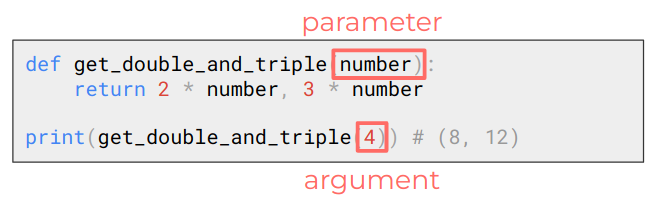

函式的 parameter 可以提供或不提供預設值。對於沒有預設值的 parameter（例如範例中的 `number` 與 `factor`），相對應的 argument 要按照順序填入，我們稱為 positional argument。

positional argument 為必填，當漏填時會產生錯誤。

In [ ]:
def get_power(number, factor):
    return number ** factor

print(get_power(2, 2)) # 4 (2 ^ 2)
print(get_power(3, 2)) # 9 (3 ^ 2)
print(get_power(4)) # This will cause an error.

當 parameter 有預設值時，其對應的 argument 稱為 keyword argument。

keyword argument 可以不填值，當不填時就會用預設值。另外，keyword argument 可以不按照順序填入。

In [ ]:
def get_power(number, factor=2, to_int=True):
    result = number ** factor
    return int(result) if to_int else result

print(get_power(2)) # 4 (2 ^ 2)
print(get_power(2, factor=2)) # 4 (2 ^ 2)
print(get_power(2, factor=3)) # 8 (2 ^ 3)
print(get_power(2.5, to_int=False, factor=3)) # 15.625 (2.5 ^ 3)

當一個函式同時包含沒有預設值以及有預設值的 parameter 時，沒有預設值的 parameter 必須定義在前面

範例一是合法的函式定義，範例二是則會出現錯誤

In [ ]:
# Valid function definition.
def get_power(number, factor=2, to_int=True):
    result = number ** factor
    return int(result) if to_int else result

In [ ]:
# Invalid function definition.
def get_power(factor=2, number, to_int=True):
    result = number ** factor
    return int(result) if to_int else result

同樣的，同時有 positional argument 跟 keyword argument 時，positional argument 一定要都定義在 keyword argument 前面

In [ ]:
def get_power(number, factor=2, to_int=True):
    result = number ** factor
    return int(result) if to_int else result

# Valid function call.
get_power(2, factor=3)

# Invalid function call.
get_power(factor=3, 2)

### 區域變數（local variables）

函式內部建立的任何變數，包含 parameter 本身，皆為區域變數（local variables），例如範例中的 `number_y`, 與 `number_x`。對於非 paramter 的區域變數修改，不會對函式外部的變數造成影響。

In [ ]:
def simple_function(number_y):
    number_x = number_y
    print("In function:", number_x) # 30

number_x = 100
print("Out of function:", number_x) # 100

simple_function(30)
print("Out of function:", number_x) # 100 (Didn't change)

但對 parameter 修改則需要非常小心，有時候可能會出現 bug。

修改 parameter「本身」不會對外部變數造成影響（範例一），但是當傳入的 argument 是參照到可變物件（例如 list、dict），並且從函式內修改物件的「內容」時，函式外部也會看到該物件的改變（範例二）

In [ ]:
def increase_one(number):
    number = number + 1

x = 10

increase_one(x)
print(x) # 10

In [ ]:
def append_one(lst):
    lst.append(1)

x = [3, 2]

append_one(x)
print(x) # [3, 2, 1]

因此我們有一個原則：**盡量不要修改函式 parameter 的內容**。

當我們真的要對其內容做修改時，最簡單的作法是先複製一份

In [ ]:
def append_one(lst):
    new_lst = lst[:] # Copy the list.
    new_lst.append(1)

    return new_lst

x = [3, 2]

print(append_one(x)) # [3, 2, 1]
print(x) # [3, 2]

[補充] 上面幾個範例背後的運作機制，請參考這份[連結](https://docs.google.com/presentation/d/1nHwhlccOWh9VBq1EYs7mcCyw5sGswAqwWIFFW_L5190/edit?usp=sharing)

### 函式作為變數使用

當定義一個函式後，我們可以將函式名稱指派給變數使用，並且在之後呼叫使用

In [ ]:
def get_power(number, factor):
    return number ** factor

power_fn = get_power
print(power_fn(2, 3)) # 8 (2 ^ 3)
print(power_fn) # a function object

一種好用的方式，是像 `min()`, `max()`, `sorted()` 等在比較數值時，可以多提供一個 keyword argument: `key`。`key` 是一個函式，輸入是 list 中每個 element，輸出則是這個 element 用來比較大小的數值。

範例一是對 `max()` 輸入一個 list of dict，並且用每個 dict 的 key `"age"` 的 value 來作為比較值

範例二則是對 `sorted()` 輸入一個 list of str，並且用每個 str 的長度來作為比較值

In [ ]:
def get_age(person):
    return person["age"]

persons = [{
    "name": "Biden",
    "age": 80,
}, {
    "name": "Trump",
    "age": 87,
}, {
    "name": "Su",
    "age": 18,
}]

print(max(persons, key=get_age)) # {'name': 'Trump', 'age': 87}

In [ ]:
sentences = ["long sentence", "short", "very very very long sentence"]
print(sorted(sentences, key=len)) # ['short', 'long sentence', 'very very very long sentence']

### Lambda 匿名函式

如果函式的內容比較簡短而且只用到一次，例如上面範例的 `get_age()`，我們可以考慮改用 lambda，其語法如下：

```
lambda 參數1, 參數2, ...: 回傳值
```

lambda 不太適合過於複雜的函式內容，所以適當的使用就好

In [ ]:
persons = [{
    "name": "Biden",
    "age": 80,
}, {
    "name": "Trump",
    "age": 87,
}, {
    "name": "Su",
    "age": 18,
}]

print(max(persons, key=lambda person: person["age"])) # {'name': 'Trump', 'age': 87}

## II. 模組（module）與套件（pakcage）

### 情境

情境一：

在比較正式的專案中，通常用 script 的方式開發（撰寫 `.py` 檔案）。當有成千上萬行的成程式碼，不太可能全部內容都放在同一個檔案，因此會考慮：
-  將程式碼分割為多個檔案，每個檔案稱為模組（module）
- 甚至可以將多個相關的模組集結在同個資料夾下，這個資料夾稱為套件（package）

情境二：

當已經有我自己或別人寫好的模組、套件時，我該如何用他捫？

### 模組（module）

- 一個 `.py` 結尾的檔名，會被 Python 視為一個模組
- 模組名稱就是檔案的主檔名
- 通常模組內會定義好函式、變數等，給別的程式碼使用
- 使用 `import` 來匯入模組本身或是模組裡的物件
- 同一個模組可以給不同專案重複使用

例如，我們網路上下載一個模組 `circle.py` 到 Coalb 主機中，檔案內容包含變數 `PI`（圓周率）以及函式 `get_area()`（輸入半徑，輸出圓的面積）

```python
PI = 3.14159

def get_area(radius):
    return PI * radius * radius
```

附註：在 Colab 中，最前面加上 `!` 代表該行進入指令模式，而不是執行 Python 程式碼。Colab 要用的是 Linux 指令，類似 Windows 的「命令提示字元」或 Mac 的「終端機」

In [ ]:
!wget https://raw.githubusercontent.com/AINTUT/code_2023/main/examples/circle.py -O circle.py

按 Colab 界面左邊選單的`檔案`按鈕，會看到`circle.py` 確實被下載到 Colab 主機。按鈕圖示：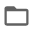


接下來我們來看如何使用它

### import

模組基本上有三種引用的形式，第一種是直接匯入整個模組，並且用 `模組.XXX` 來存取某個特定物件

```
import 模組名稱
```

In [ ]:
import circle

print(circle.PI) # 3.14159
print(circle.get_area(3)) # 28.274309999999996

第二種是匯入模組中的某（幾）個特定物件

```
from 模組名稱 import 物件名稱1, 物件名稱2, ... 
```

In [ ]:
from circle import get_area
from circle import PI

print(get_area(3)) # 28.274309999999996
print(PI) # 3.14159

第三種一次匯入模組的（幾乎）所有的物件名稱，不過建議不要這樣使用，程式碼可讀性低而且容易產生 bug

```
from 模組名稱 import *
```

[補充] 第三種形式的相關討論，請看[這裡](https://s16h.medium.com/importing-star-in-python-88fe9e8bd4d2)以及[這裡](https://peps.python.org/pep-0008/#imports)

In [ ]:
from circle import *

print(get_area(3)) # 28.274309999999996
print(PI) # 3.14159

另外，我們也可以在匯入時同時改名

```
import 模組名稱 as 新模組名稱
```

```
from 模組名稱 import 物件名稱 as 新物件名稱
```

In [ ]:
import circle as cir

print(cir.get_area(3)) # 28.274309999999996
print(cir.PI) # 3.14159

In [ ]:
from circle import get_area as get_circle_area

print(get_circle_area(3)) # 28.274309999999996

### 套件（package）

一個套件集結了多個模組：
- 套件名稱就是資料夾的名稱
- 除了模組的檔案之外，資料夾下還要包含一個 `__init__.py` 的檔案，告訴 Python 這個資料夾是一個套件
- 可以不只一層資料夾
- 使用 `import` 來匯入套件、子套件、子模組或是物件等
- 同一個套件可以給不同專案重複使用

例如，考慮以下程式碼：

```python
PI = 3.14159

def get_circle_area(radius):
    return PI * radius * radius

def get_rectangle_area(width, height):
    return width * height

def get_triangle_area(width, height):
    return width * height * 0.5
```

可以分成幾個模組檔案，以及一個內容為空的 `__init__.py`

`circle.py`:
```python
PI = 3.14159

def get_area(radius):
    return PI * radius * radius

```

`rectangle.py`:
```python
def get_area(width, height):
    return width * height
```

`triangle.py`:
```python
def get_area(width, height):
    return width * height * 0.5
```

`__init__.py`:
```python
```

並且將這幾個檔案都放在 `shape` 資料夾下

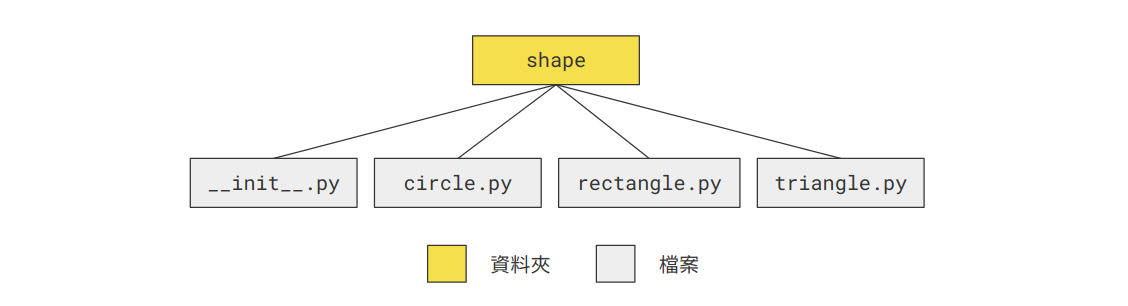

這裡我們從網路上下載套件 `shape` 到 Colab 主機中

一樣可以按界面左邊的`檔案`按鈕，會看到一個新增的 `shape` 資料夾以及底下的幾個模組檔案。

In [ ]:
!wget https://raw.githubusercontent.com/AINTUT/code_2023/main/examples/shape.zip -O shape.zip && unzip -o shape.zip && rm shape.zip

使用套件的方式跟模組相當類似，並且多了一種 `import 套件.模組` 的方式

In [ ]:
from shape import circle # Import circle module under shape package
from shape.rectangle import get_area # Import get_area function under circle module
import shape.triangle # Import triangle module under shape package

print(circle.get_area(3)) # 28.274309999999996
print(get_area(4, 3)) # 12
print(shape.triangle.get_area(4, 3)) # 6.0

### Python Standard Library

Python 內建的 library（函式庫）提供許多好用的模組或套件，例如 `random` 是一個提供產生隨機數相關函式的模組，`datetime` 是與日期、時間相關，`math` 則是與數學計算相關

完整的清單，請看[這裡](https://docs.python.org/3/library/)

In [ ]:
import random

print(random.random()) # A floating-point between 0 (included) and 1 (excluded).
print(random.randint(3, 10)) # An integer between 3 (included) and 10 (included).

In [ ]:
from datetime import datetime

print(datetime.now()) # Current date.

In [ ]:
import math

print(math.ceil(3.6)) # 4 (Ceiling of 3.6)
print(math.floor(3.6)) # 3 (Ceiling of 3.6)

### Python Third-Party Library 與 pip 套件管理工具

除了 Python 內建的套件之外，也有很多由 third-party（第三方）開發的套件

要下載這些套件，一種方法是透過 [PyPI](https://pypi.org/) 來尋找需要的套件，不過相關相依性問題都要自己解決，會很麻煩

另一種更常見的方法，是使用 `pip` 這個套件管理工具。pip 會去下載並安裝 PyPI 上的套件，並且自動解決相關的相依性問題

當我們要下載某個套件時，只要輸入指令 `pip install 套件名稱` 即可，例如範例會下載名稱為 `gradio` 的套件

In [ ]:
!pip install gradio

接下我們就可以在 Python 程式碼中使用下載的套件

In [ ]:
import gradio

print(gradio.__version__)

介紹一些 pip 常用的指令，例如我們可以指令特定的套件版本

In [ ]:
!pip install gradio==3.19.1

或是安裝該套件的最新版本

In [ ]:
!!pip install --upgrade gradio

我們也可以一次下載多個套件

In [ ]:
!pip install gradio streamlit

查看某個套件的資訊

In [ ]:
!pip show gradio

列出所有已安裝的套件

In [ ]:
!pip list

## III. numpy

在機器學習或深度學習領域，我們常常需要處理類似（巢狀） list 的資料，並且在這些資料上做運算

雖然我們可以用（巢狀） list 來達成，但效率不高而且缺乏相關運算的函式，這時候使用 numpy 是相當適當的選擇

numpy 的特點
- 主要用在資料處理
- 可以有效率的產生並且操作多維度的陣列
- 許多機器學習領域/深度學習的套件都是奠基在 numpy 的基礎上

### numpy 的安裝與使用

numpy 的安裝相當簡單，只要使用 pip 安裝即可

In [ ]:
!pip install numpy

import 匯入的名稱是 `numpy`，而且我們通常上都會縮寫成 `np`

In [ ]:
import numpy as np

### numpy.ndarray

`numpy.ndarray` 為 numpy 最主要的資料型別，可以用來創建、儲存各種維度的資料：0 維、1 維、2 維、3 維、....



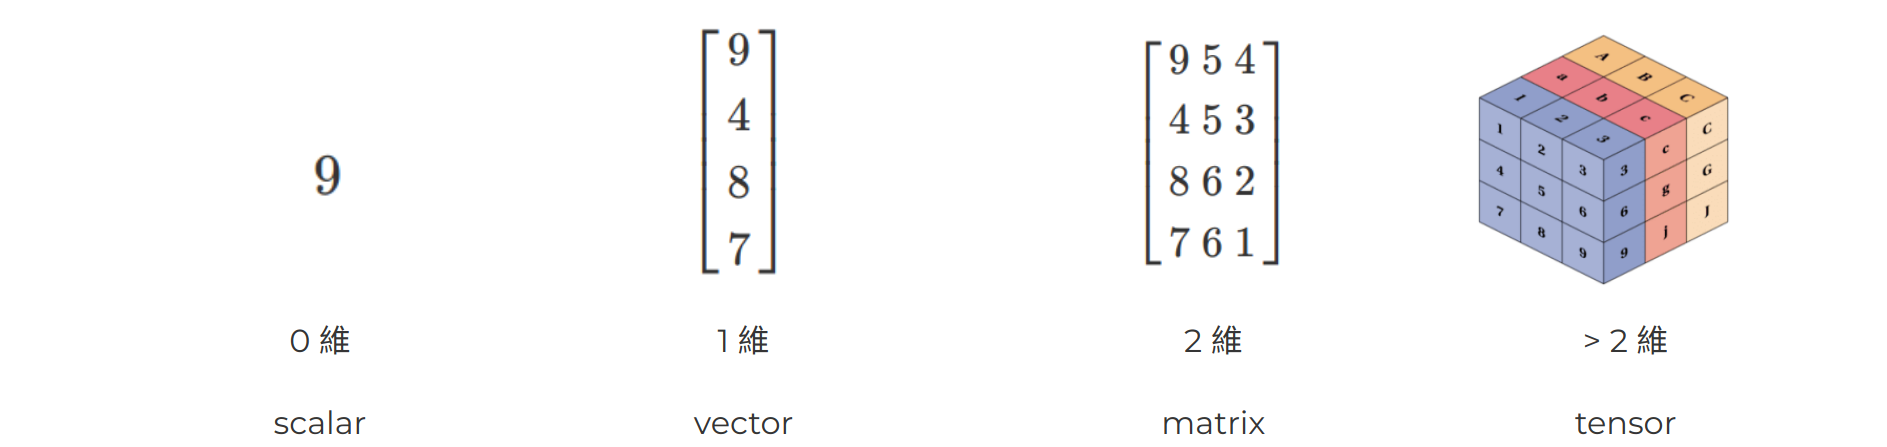

創建 numpy.ndarray 的最直接方法，是用 `numpy.array()` 裡輸入一個 list 或 tuple

如範例我們建立了 1 維的 numpy.narray

vector: $\begin{bmatrix}0 \\ 1 \\ 2 \end{bmatrix}$

In [ ]:
vector = np.array([0, 1, 2])
print(vector) # [0 1 2]

vector = np.array((0, 1, 2))
print(vector) # [0 1 2]

如果輸入的 list 或 tuple 是巢狀的話，則可以建立多維的 numpy.ndarray。下面範例建立一個形狀為 2 x 3 的 2 維 numpy.ndarray

matrix: $\begin{bmatrix}0 \ 1 \ 2 \\ 3 \ 4 \ 5 \end{bmatrix}$

In [ ]:
matrix = np.array([[0, 1, 2], [3, 4, 5]])
print(matrix) # [[0 1 2] [3 4 5]]

或是用 numpy 之下的函式來建立 numpy.ndarray，例如：
- `numpy.zeros()`: 建立一系列的 0
- `numpy.ones()`: 建立一系列的 1
- `numpy.arange()`: 建立一系列的數字（類似之前學過的 `range()`，但是更有彈性）

In [ ]:
vector = np.zeros(3)
print(vector) # [0. 0. 0.]

vector = np.ones(3)
print(vector) # [1. 1. 1.]

In [ ]:
vector = np.arange(3)
print(vector) # [0 1 2]

In [ ]:
vector = np.arange(1, 3)
print(vector) # [1 2]

In [ ]:
vector = np.arange(1, 10, 2)
print(vector) # [1  3 5 7 9]

In [ ]:
vector = np.arange(1, 2, 0.2)
print(vector) # [1. 1.2 1.4 1.6 1.8]

每個 numpy.ndarray 都有相關屬性可以查看，常用的像是：
- `ndim`: 這個 numpy.ndarray 的維度
- `shape`: 這個 numpy.ndarray 的形狀為何
- `size`: 這個 numpy.ndarray 總共有幾個 element
- `dtype`: 這個 numpy.ndarray 的資料型別


In [ ]:
matrix = np.array([[0, 1, 2], [3, 4, 5]])

print(matrix.ndim) # 2
print(matrix.shape) # (2,3)
print(matrix.size) # 6
print(matrix.dtype) # "int64"

在建立 numpy.ndarray 時，可以加入 keyword argument `dtype` 來指定資料型別，或是在建立後呼叫 `.astype()` 來轉化型別

In [ ]:
vector = np.ones(3)
print(vector) # [1. 1. 1.]
print(vector.dtype) # float64

In [ ]:
vector = np.ones(3, dtype=int)
print(vector) # [1 1 1]
print(vector.dtype) # int64

In [ ]:
vector = np.ones(3).astype(int)
print(vector) # [1 1 1]
print(vector.dtype) # int64

In [ ]:
vector = np.ones(3).astype(bool)
print(vector) # [True True True]
print(vector.dtype) # bool

我們也可以改變 numpy.ndarray 的形狀：
- `numpy.ndarray.reshape()`: 改變成指定的形狀
- `numpy.ndarray.flatten()`: 改變成 1 惟的形狀

In [ ]:
matrix = np.arange(6).reshape((2, 3)) # Reshape [0 1 2 3 4 5] to [[0 1 2] [3 4 5]]
print(matrix) # [[0 1 2] [3 4, 5]]
print(matrix.ndim) # 2
print(matrix.shape) # (2,3)

In [ ]:
matrix = np.arange(6).reshape((2, 3))
vector = matrix.flatten() # Flatten [[0 1 2] [3 4 5]] to [0 1 2 3 4 5]
print(vector) # [0 1 2 3 4 5]
print(vector.ndim) # 1
print(vector.shape) # (6,)

要注意一下，大部分 numpy 的操作，並不會改變原 numpy.ndarray 本身的內容，而是另外建立一份新的 numpy.ndarray

In [ ]:
vector = np.arange(6)
print(vector.reshape((2, 3))) # [[0 1 2] [3 4 5]]
print(vector) # [0 1 2 3 4 5] (Didn't change)

### 存取 numpy.ndarray 的內容

numpy.ndarray 提供類似 list 的操作，例如 index、slicing

vector:
$\begin{bmatrix}0 \\ 1 \\ 2 \end{bmatrix}$



In [ ]:
vector = np.array([0, 1, 2])
print(vector[0]) # 0
print(vector[0:2]) # [0 1]

對於多維 numpy.ndarray 的 index 或 slicing，我們會用這樣的寫法：一組中括號加上幾個逗號

 atrix: $\begin{bmatrix}0 \ 1 \ 2 \\ 3 \ 4 \ 5 \end{bmatrix}$

In [ ]:
matrix = np.array([[0, 1, 2], [3, 4, 5]])
print(matrix[1, 2]) # 5
print(matrix[1]) # [3 4, 5]
print(matrix[1, 1:2]) # [4]
print(matrix[:, 1:2]) # [[1] [4]]

也可以修改 element 的內容

In [ ]:
vector = np.array([0, 1, 2])
print("Before:", vector) # [0 1 2]

vector[2] = 3
print("After:", vector) # [0 1 3]

In [ ]:
matrix = np.array([[0, 1, 2], [3, 4, 5]])
print("Before:")
print(matrix)# [[0 1 2], [3 4 5]]

matrix[0, 2] = 4
print("After:")
print(matrix) # [[0 1 4], [3 4 5]]

要注意的是，無法對一個 numpy.ndarray 動態的增加或刪減 element

In [ ]:
lst = [0, 1, 2]

del lst[0] # OK

In [ ]:
vector = np.array([0, 1, 2])

del vector[0] # This will cause an error.

之前學到的 list 相關函式，其中幾個在 numpy 中也有相對應的版本，例如：
- `numpy.ndarray.max()`
- `numpy.ndarray.min()`
- `numpy.ndarray.sum()`
- `numpy.ndarray.sort()` (這個**會**改變原 numpy.ndarray 的內容)

In [ ]:
vector = np.array([80, 50, 30, 100])
print(vector.max()) # 100
print(vector.min()) # 50
print(vector.sum()) # 260 (80 + 50 + 30 + 100))

vector.sort()
print(vector) # [30 50 80 100]

In [ ]:
matrix = np.array([[80, 50, 10], [30, 110, 100]])
print(matrix.max()) # 110
print(matrix.min()) # 10
print(matrix.sum()) # 380 (80 + 50 + 10 + 30 + 110 + 100)

matrix.sort()
print(matrix) # [[10  50  80] [30 100 110]]

對於多維的 numpy.ndarray，還可以加上 keyword argument `axis`，可以得到沿著某軸的計算結果

In [ ]:
matrix = np.array([[80, 50, 10], [30, 110, 100]])
print(matrix.max(axis=0)) # [80 110 100] ([[80 30].max() [50 110].max() [10 100].max()])
print(matrix.min(axis=1)) # [10, 30] ([[80 50 10].min() [30 110 110].min()])
print(matrix.sum(axis=1)) # [140 240]] ([[80 50 10].sum() [30 110 110].sum()])

matrix.sort(axis=0)
print(matrix) # [[30  50  10] [80 110 100]]

有些功能前面加上 `arg`，會得到相對應的索引位置，而非內容本身：
- `numpy.ndarray.argmax()`
- `numpy.ndarray.argmin()`
- `numpy.ndarray.argsort()` (這個**不會**改變原 numpy.ndarray 的內容)

In [ ]:
vector = np.array([80, 50, 30, 100])
print(vector.argmax()) # 3 (index of 100)
print(vector.argmin()) # 2 (index of 30)
print(vector.argsort()) # [2 1 0 3] (indices of [30 50 80 100])

numpy 也提供基本的統計功能，例如：
- `numpy.ndarray.mean()`: 平均數
- `numpy.ndarray.std()`: 標準差
- `numpy.ndarray.cov()`: 變異數

In [ ]:
vector = np.array([80, 50, 30, 100, 90, 70, 60, 100, 20, 90, 160, 10, 10, 20, 30, 90, 100])
print(vector.mean()) # 65.29411764705883
print(vector.std()) # 40.31021576238074
print(vector.var()) # 1624.9134948096887

### numpy 基本運算

numpy.ndarray 提供許多基本的數學運算，例如 `+`、`-`、`*`、`/`, `**`

這些運算是 element-wise，也就是對每個 element 會獨自做運算，因此乘號 `*` 是做 element-wise product，而不是做類似矩陣相乘的運算

運算基本上需要兩個形狀相同的 numpy.ndarray，但有時候即使不相同也可以得到結果（我們稱之為 Broadcasting），例如下面兩個範例中的 `numpy.ndarray + 2`

In [ ]:
vector_1 = np.array([0, 1, 2])
vector_2 = np.array([3, 4, 5])

print(vector_1 + vector_2) # [3 5 7]
print(vector_1 - vector_2) # [-3 -3 -3]
print(vector_1 * vector_2) # [0 4 10]
print(vector_1 / vector_2) # [0. 0.25 0.4]
print(vector_1 ** vector_2) # [ 0  1 32]
print(vector_1 + 2) # [2 3 4]

In [ ]:
matrix_1 = np.array([[0, 1, 2], [3, 4, 5]])
matrix_2 = np.array([[2, 4, 6], [8, 10, 12]])

print(matrix_1 + matrix_2) # [[2  5  8] [11 14 17]]
print(matrix_1 - matrix_2) # [[-2 -3 -4] [-5 -6 -7]]
print(matrix_1 * matrix_2) # [[0 4 12] [24 40 60]]
print(matrix_1 / matrix_2) # [[0. 0.25 0.33333333] [0.375 0.4 0.41666667]]
print(matrix_1 ** matrix_2) # [[0 1 64] [6561 1048576 244140625]]
print(matrix_1 + 2) # [[2  3  4] [5 6 7]]

之前學到的一些比較符號，例如 `==`, `!=`, `>`, `>=`, `<`, `<=` 等也都可以用

In [ ]:
vector_1 = np.array([0, 4, 2])
vector_2 = np.array([3, 4, 5])

print(vector_1 == vector_2) # [False True False]
print(vector_1 != vector_2) # [True False True]
print(vector_1 > vector_2) # [False False False]
print(vector_1 >= vector_2) # [False True False]
print(vector_1 < vector_2) # [True False True]
print(vector_1 <= vector_2) # [True True True]

### dot product

numpy 提供 `numpy.ndarray.dot()` 運算，稱之為 dot product。對於 1 維 或是 2 維的 numpy.ndarray 而言，可以想成是在做矩陣相乘

這種運算常常出現在機器學習/深度學習的領域中，例如我們要做下列計算：

$w_1x_1 + w_2x_2 + w_3x_3 + b$

可以定義一個 weights vector $\begin{bmatrix}w_1 \\ w_2 \\ w_3 \end{bmatrix}$、一個 features vector $\begin{bmatrix}x_1 \\ x_2 \\ x_3 \end{bmatrix}$、以及 bias $b$，對 weights 跟 features 做 dot product 後再加上 bias：

$\begin{bmatrix}w_1 \ w_2 \ w_3 \end{bmatrix}̇\cdot\begin{bmatrix}x_1 \\ x_2 \\ x_3 \end{bmatrix} + b$



對兩個 vector 做 dot product，會得到一個 scalar

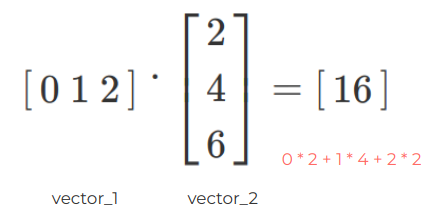

In [ ]:
vector_1 = np.array([0, 1, 2])
vector_2 = np.array([2, 4, 6])

print(vector_1.dot(vector_2)) # 16

一個 matrix 做一個 vector 做 dot product，會得到一個 vector

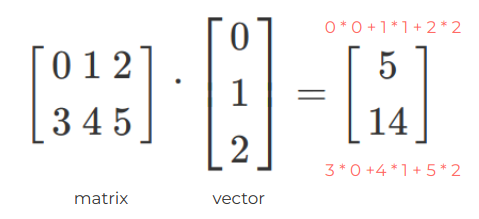

In [ ]:
matrix = np.array([[0, 1, 2], [3, 4, 5]])
vector = np.array([0, 1, 2])

print(matrix.dot(vector)) # [5, 14]

對兩個 matrix 做 dot product，會得到一個 matrix

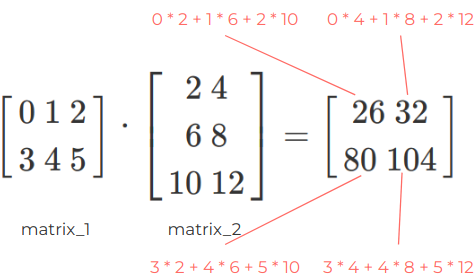

In [ ]:
matrix_1 = np.array([[0, 1, 2], [3, 4, 5]])
matrix_2 = np.array([[2, 4], [6, 8], [10, 12]])

print(matrix_1.dot(matrix_2)) # [[26, 32], [80, 104]]

### numpy.函式()

上述提到的 `numpy.ndarray.方法()`或是 numpy.ndarray 的基本運算，基本上都有相對應的 `numpy.函式()`，以下範例秀出其中一小部份

In [ ]:
vector = np.array([80, 50, 30, 100])

print(vector.max()) # 100
print(np.max(vector)) # 100

In [ ]:
vector = np.array([80, 50, 30, 100])

print(vector.argmax()) # 3
print(np.argmax(vector)) # 3

In [ ]:
vector = np.array([80, 50, 30, 100, 90, 70, 60, 100, 20, 90, 160, 10, 10, 20, 30, 90, 100])
print(vector.mean()) # 65.29411764705883
print(np.mean(vector)) # 65.29411764705883

In [ ]:
vector_1 = np.array([0, 1, 2])
vector_2 = np.array([3, 4, 5])

print(vector_1 + vector_2) # [3 5 7]
print(np.add(vector_1, vector_2)) # [3 5 7]

In [ ]:
vector_1 = np.array([0, 4, 2])
vector_2 = np.array([3, 4, 5])

print(vector_1 == vector_2) # [False True False]
print(np.equal(vector_1, vector_2)) # [False True False]

In [ ]:
vector_1 = np.array([0, 1, 2])
vector_2 = np.array([3, 4, 5])

print(vector_1.dot(vector_2)) # 14
print(np.dot(vector_1, vector_2)) # 14

### 更深入了解 numpy

numpy 的功能眾多，課堂上僅能很有限的列出一小部份。如果想要更深入了解，很推薦同學找時間閱讀這兩份教學：
- [NumPy: the absolute basics for beginner](https://numpy.org/devdocs/user/absolute_beginners.html)
- [NumPy quickstart](https://numpy.org/devdocs/user/quickstart.html)

當要尋找或查閱 numpy 功能時，也可以使用官方說明文件：
- [NumPy Documentation](https://numpy.org/doc/)

## IV. matplotlib

在任何資料處理與分析的過程中，我們常常需要透過視覺化的方式來了解資料的狀況，matplotlib 提供許多基本好用的功能

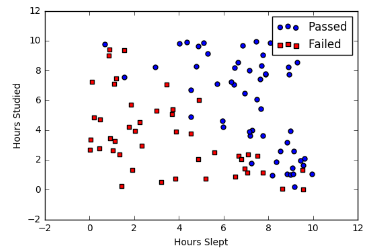

（[圖片來源](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)）

### matplotlib 的安裝與使用

matplotlib 只要使用 pip 安裝即可

In [ ]:
!pip install matplotlib

matplotlib 最常使用的是它底下的 `pyplot` 模組，通成會簡寫成 `plt`

In [ ]:
import matplotlib.pyplot as plt

### matplotlib 基本功能

最基本的功能，可以用來畫各種類型的圖表，例如：折線圖、長條圖、散佈圖 ... 等

像是折線圖，可以使用 `pyplot.plot()`，其中：
- y 軸的資料必須要提供
- x 軸的資料可以不給，預設為 0, 1, 2, 3, ...

In [ ]:
plt.plot([1, 2, 3, 4])
plt.show()

In [ ]:
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])
plt.show()

除了 list 之外，也可以用 numpy.ndarray 當作資料輸入

In [ ]:
import numpy as np

numbers_x = np.arange(1, 5) # [1 2 3 4]
numbers_y = np.arange(1, 5) # [1 2 3 4]

plt.plot(numbers_x, numbers_y)
plt.show()

In [ ]:
numbers_x = np.arange(0, 10) # [0 1 2 3 4 5 6 7 8 9]
numbers_y = numbers_x ** 2 # [0 1 4 9 16 25 36 49 64 81]

plt.plot(numbers_x, numbers_y)
plt.show()

In [ ]:
numbers_x = np.arange(0, np.pi * 2, 0.1) # [0. 0.1 0.2 ... 6.1 6.2]
numbers_y = np.sin(numbers_x) # [sin(0.) sin(0.1) sin(0.2) ... sin(6.1) sin(6.2)]

plt.plot(numbers_x, numbers_y)
plt.show()

matplotlib 提供不同的 style（風格）、客製化選項

In [ ]:
plt.plot([1, 2, 3, 4], [1, 2, 3, 4], "ro") # "ro": red dot
plt.xlabel("axis-x") # Set label name of x-axis
plt.ylabel("axis-y") # Set label name of y-axis
plt.title("You Cool Title") # Set title
plt.axis([0, 5, 0, 5]) # Specify the viewport of the axes. The format is [xmin, xmax, ymin, ymax]
plt.show()

In [ ]:
numbers_x = [1, 2, 3, 4]
numbers_y = [1, 2, 3, 4]

plt.plot(numbers_x, numbers_y, "purple") # purple line
plt.plot(numbers_x, numbers_y, "bo") # blue dot
plt.show()

如果要繪製長條圖，可以使用 `pyplot.bar()`

In [ ]:
stores = ["7-11", "family mart", "hi-life", "OK"]
sales = [9, 4, 8, 7]

plt.bar(stores, sales)
plt.show()

如果要繪製散佈圖，可以使用 `pyplot.scatter()`

In [ ]:
heights = [182, 166, 166, 185, 179, 173, 180, 184, 170, 168]
weights = [72, 88, 68, 86, 60, 58, 74, 71, 77, 60]

plt.scatter(heights, weights)
plt.show()

In [ ]:
male_heights = [182, 166, 166, 185, 179, 173, 180, 184, 170, 168]
male_weights = [72, 88, 68, 86, 60, 58, 74, 71, 77, 60]

female_heights = [150, 159, 158, 168, 175, 150, 168, 153, 165, 151]
female_weights = [59, 42, 49, 43, 49, 43, 70, 56, 57, 62]

plt.scatter(male_heights, male_weights, c="red", label="male") # red color point, "male" label
plt.scatter(female_heights, female_weights, c="green", label="female") # green color point, "female" label
plt.legend() # Show legend
plt.show()

如果要繪製直方圖（histogram），可以使用 `pyplot.hist()`

In [ ]:
numbers = np.array([1, 1, 1, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4])

plt.hist(numbers)
plt.show()

In [ ]:
numbers = np.random.randn(10000) # Sample 10,000 numbers from normal distribution

plt.hist(numbers, bins=100)
plt.show()

如果要在圖上同時繪製好幾個圖表在同份，可以使用 `plt.subplot()` 的功能

範例的 `211`，前兩個數字（`21`）代表要分割成 2 個 row 1 個 column，第三個數字（`1`）則代表分割後的第 1 個子區域

In [ ]:
numbers = np.arange(0, np.pi * 4, 0.1)

plt.figure(figsize=(10, 10)) # Create a new figure (container) whose size is 10 x 10

plt.subplot(211)
plt.plot(numbers, np.sin(numbers), c="blue")
plt.title("Sine")

plt.subplot(212)
plt.plot(numbers, np.cos(numbers), c="red")
plt.title("Cosine")

plt.show()

### 操作 matplotlib 的兩種方法

上述提到的操作方法，在 matplotlib 稱為 implicit "pyplot" interface，也就是一切都透過 `pyplot.函式()` 來操作，相對比較簡單，在需求不複雜的情況下可能就夠用了

另一種更有彈性、能解決複雜需求的操作方法稱為 explicit "Axes" interface，透過操作型別為 `Axes` 的物件來達成需求。有興趣的同學也可以自己學學看。

關於這兩種操作方法的詳細差別，請參考 [Matplotlib Application Interfaces (APIs)](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces)

In [ ]:
 # implicit "pyplot" interface
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])
plt.show()

In [ ]:
# explicit "Axes" interface
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 2, 3, 4])
fig.show()

### 更深入了解 matplotlib

matplotlib 提供的功能相當完整複雜，目前了解到此即可。之後如果有遇到任何需求，邊做邊查詢就好。

如果你很想要了解再多一點，推薦這兩份教學：
- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
- [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

### seaborn

seaborn 是一個基於 matplotlib 的資料視覺化套件，可以比 matplotlib 更輕鬆地繪製出專業的圖表，通常會搭配下次會提到的 pandas 一起使用。

這裡僅秀出一個簡單範例，想了解更多的同學請參考[官方文件](https://seaborn.pydata.org/)

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

# Apply the default theme.
sns.set_theme()

# Load an example dataset.
tips = sns.load_dataset("tips")

# Create a visualization.
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker",
    style="smoker",
    size="size",
)

# Show the result.
plt.show()

# Reset to defaults (such as the theme).
sns.reset_defaults()

## V. 應用練習題

### 練習題（一）：句子計數器

我們想要幫一個句子根據條件計算長度。請分完成以下兩個函式：
1. `count_alphabet()`：計算輸入的句子（`sentence`）總共有幾個英文字母
2. `count_sentence()`：除了計算輸入的句子（`sentence`）有幾個英文字母之外，也可能根據需求（`include_digit` 是否為 True）再加上有幾個數字

[提示 1] 目前兩個函式都實做到一半，執行會出錯，請試著修改至不會出錯，並且能讓結果是對的

[提示 2] 你可能需要了解以下函式的基本概念：
- return
- parameter 與 argument

In [ ]:
#@title 1. `count_alphabet()`：計算某個輸入的句子（`sentence`）總共有幾個英文字母
def count_alphabet(): # PLEASE MODIFY
    num_alphabet = len([ch for ch in sentence if ch.isalpha()])

    return # PLEASE MODIFY

sentence = "Sometimes there (are) 30 minutes of silence, but then the city is again under attack (from) tanks."
num_alphabet = count_alphabet(sentence)

print("Number of alphabet =", num_alphabet) # Expected output: 74

In [ ]:
#@title 參考解答
def count_alphabet(sentence): # PLEASE MODIFY
    num_alphabet = len([ch for ch in sentence if ch.isalpha()])

    return num_alphabet # PLEASE MODIFY

sentence = "Sometimes there (are) 30 minutes of silence, but then the city is again under attack (from) tanks."
num_alphabet = count_alphabet(sentence)

print("Number of alphabet =", num_alphabet) # Expected output: 74

In [ ]:
#@title 2. `count_sentence()`：除了計算輸入的句子（`sentence`）有幾個英文字母之外，也可能根據需求（`include_digit` 是否為 True）再加上有幾個數字
def count_sentence(): # PLEASE MODIFY
    num_alphabet = count_alphabet(sentence)

    if include_digit:
        num_digit = len([ch for ch in sentence if ch.isdigit()])
        result = num_alphabet + num_digit
    else:
        result = num_alphabet

    return # PLEASE MODIFY

sentence = "Sometimes there (are) 30 minutes of silence, but then the city is again under attack (from) tanks."
num_alphabet = count_sentence(sentence)
num_alphabet_digit = count_sentence(sentence, include_digit=True)

print("Number of alphabet =", num_alphabet) # Expected output: 74
print("Number of alphabet and digit =", num_alphabet_digit) # Expected output: 76

In [ ]:
#@title 參考解答
def count_sentence(sentence, include_digit=False): # PLEASE MODIFY
    num_alphabet = count_alphabet(sentence)

    if include_digit:
        num_digit = len([ch for ch in sentence if ch.isdigit()])
        result = num_alphabet + num_digit
    else:
        result = num_alphabet

    return result # PLEASE MODIFY

sentence = "Sometimes there (are) 30 minutes of silence, but then the city is again under attack (from) tanks."
num_alphabet = count_sentence(sentence)
num_alphabet_digit = count_sentence(sentence, include_digit=True)

print("Number of alphabet =", num_alphabet) # Expected output: 74
print("Number of alphabet and digit =", num_alphabet_digit) # Expected output: 76

### 練習題（二）：一元二次方程式求解

某個聰明的國中生在學會一元二次方程式的公式解後，便試著自己帶入各種的數字來手動計算。然後在確認答案時，需要一直按計算機實在太慢了。因此希望能請你幫忙用 Python 寫一個名為 `get_answer()` 的 函式，並且得到以下的答案：
1. $a = 1, b = 4, c = 0$ 的答案
2. $a = 2, b = 3, c = -9$ 的答案
3. $a = 3, b = -4, c = -7$ 的答案
4. $a = 3, b = -4, c = -7$ 的答案，並且將答案的小數點捨棄

一元二次方程式的公式解如下：

已知 $ax^2 + bx + c = 0 (a ≠ 0)$，則 $ x = (\frac{-b + \sqrt{b^2 - 4ac}}{2a}, \frac{-b - \sqrt{b^2 - 4ac}}{2a})$

[提示] 你可能需要了解以下知識：
- 基本的數值運算
- 型別轉換，運用 `int()` 將 floating point 轉成 integer
- 用 ** 符號做次方的運算（例如：`3 ** 2` 代表 3 的平方，`3 ** 0.5` 代表 3 的開根號）
- 函式的基本概念，包含 parameter, argument 與 return 等
- 了解 function 的 positional argument 跟 keyword argument 的差別

In [ ]:
# Define a function to calculate the answer for ax^2 + bx + c = 0.
def get_answer(coeff_a, coeff_b, coeff_c, to_int=False):
    if coeff_a == 0:
        raise ValueError("Coefficient `a` must not be zero!") 

    # PLEASE MODIFY CODE BELOW.
    answer = (0.0, 0.0)

    return answer

In [ ]:
#@title 參考解答

# Define a function to calculate the answer for ax^2 + bx + c = 0.
def get_answer(coeff_a, coeff_b, coeff_c, to_int=False):
    if coeff_a == 0:
        raise ValueError("Coefficient `a` must not be zero!") 

    # PLEASE MODIFY CODE BELOW.
    root_part = (coeff_b ** 2 - 4 * coeff_a * coeff_c) ** 0.5
    pos = (-coeff_b + root_part) / (2 * coeff_a)
    neg = (-coeff_b - root_part) / (2 * coeff_a)
    
    if not to_int:
        answer = (pos, neg)
    else:
        answer = (int(pos), int(neg))

    return answer

In [ ]:
answer_140 = get_answer(1, 4, 0)
print("When a = 1, b = 4, c = -0, Answer =", answer_140) # Expected output: (0.0, -4.0)

In [ ]:
answer_23m9 = get_answer(2, 3, -9)
print("When a = 2, b = 3, c = -9, Answer =", answer_23m9) # Expected output: (1.5, -3.0)

In [ ]:
answer_3m4m7 = get_answer(3, -4, -7)
print("When a = 3, b = -4, c = -7, Answer =", answer_3m4m7) # Expected output: (2.3333333333333335, -1.0)

In [ ]:
answer_3m4m7_int = get_answer(3, -4, -7, to_int=True)
print("When a = 3, b = -4, c = -7, Answer (Approximate Version) =", answer_3m4m7_int) # Expected output: (2, -1)

### 練習題（三）：時間管理大師

做事很有原則的小株，從小目標成為時間管理大師。她每次做事情時，都會紀錄事情開始與完成的時間，並且要求自己每件事情都能在 9487 秒（含）內完成。這是她在 2023 年 3 月 8 日所完成的事情以及時間：
- 幫媽媽跑腿買醬油：早上 10 點 32 分 56 秒 到 下午 1 點 8 分 23 秒
- 出門健身：下午 2 點 37 分 44 秒 到 下午 5 點 50 分 50 秒

請你幫忙實做兩個 function：`get_elapsed()` 與 `is_safe()`，並且求出以下答案：
1. 幫媽媽跑腿買醬油總共花了多少秒？
2. 幫媽媽跑腿買醬油是否有符合小於等於 9487 秒的要求？
3. 出門健身共花了多少秒？
4. 出門健身是否有符合小於等於 9487 秒的要求？

[提示] 你可能需要了解以下知識：
- import 的基本觀念
- 學會看 Python Standard Library 的文件
- 兩個 [datetime.datetime](https://docs.python.org/3/library/datetime.html#datetime.datetime) 物件之間可以做運算，例如兩個 `datetime.datetime` 物件相減，會產生 [datetime.timedelta](https://docs.python.org/3/library/datetime.html#datetime.timedelta) 物件 
- [datetime.timedelta](https://docs.python.org/3/library/datetime.html#datetime.timedelta) 物件可以藉由 [total_seconds()](https://docs.python.org/3/library/datetime.html#datetime.timedelta.total_seconds) 這個方法來計算總共過了幾秒（但請注意我們要的是整數，不需要小數位喔）

In [ ]:
from datetime import datetime

In [ ]:
# Calculate the elapsed time from a date to another date.
def get_elapsed(date_from, date_to):
    if date_from > date_to:
        raise ValueError("`date_from` must be less or equal to `date_to`!")

    # PLEASE MODIFY CODE BELOW.
    elapsed = 0

    return elapsed

In [ ]:
#@title 參考解答
def get_elapsed(date_from, date_to):
    if date_from > date_to:
        raise ValueError("Date from must be <= date to!")

    # PLEASE MODIFY CODE BELOW.
    elapsed = int((date_to - date_from).total_seconds())

    return elapsed

In [ ]:
def is_safe(elapsed, limit=9487):
    return False # PLEASE MODIFY.

In [ ]:
#@title 參考解答
def is_safe(elapsed, limit=9487):
    return elapsed <= limit # PLEASE MODIFY.

In [ ]:
shopping_start = datetime(2023, 3, 8, hour=10, minute=32, second=56)
shopping_end = datetime(2023, 3, 8, hour=13, minute=8, second=23)

In [ ]:
workout_start = datetime(2023, 3, 8, hour=14, minute=37, second=44)
workout_end = datetime(2023, 3, 8, hour=17, minute=50, second=50)

In [ ]:
#@title 1. 幫媽媽跑腿買醬油總共花了多少秒？
shopping_elapsed = get_elapsed(shopping_start, shopping_end)
print("Shopping Time =", shopping_elapsed) # Expected output: 9327

In [ ]:
#@title 2. 幫媽媽跑腿買醬油是否有符合小於等於 9487 秒的要求？
shopping_safe = is_safe(shopping_elapsed)
print("Is Shopping Safe ?", shopping_safe) # Expected output: True

In [ ]:
#@title 3. 出門健身共花了多少秒？
workout_elapsed = get_elapsed(workout_start, workout_end)
print("Workout Time =", workout_elapsed) # Expected output: 11586

In [ ]:
#@title 4. 出門健身是否有符合小於等於 9487 秒的要求？
workout_safe = is_safe(workout_elapsed)
print("Is Workout Safe ?", workout_safe) # Expected output: False

### 練習題（四）：銷售管理系統

我們得到了某家店某個月所有商品的銷售資料，包含各個商品的單價（`unit_prices`）以及各個商品每天的銷售量（`num_sales`）。我們想要從中得知：
1. 這家店總共有幾種商品？
2. 該月總共有幾天？
3. 第 2 個商品的單價為多少？
4. 如果所有商品各買一個，總共會花多少錢？
5. 該月第 2 天總共銷售了幾個商品？
6. 該月第 2 天的銷售金額為多少？
    - 可以參考：兩個 vector 的 dot product，以及下圖一，幫助你思考
7. 該月的總銷售金額為多少？
    - 可以參考：matrix 跟 vector 的 dot product，以及下圖一，幫助你思考
8. 畫一張圖表，x 軸為該月的第幾天，y 軸為每天的銷售金額，結果類似圖二
9. 畫一張圖表，x 軸為該月的第幾天，y 軸為每天的銷售商品總量，結果類似圖三
10. 該月第幾天的銷售商品總量最低？
11. 第 2 個商品的平均一天可以賣幾個？
12. 承上題，第 2 個商品總共有幾天的商品銷售量大於該商品的平均銷售量？
13. 前 10 天（亦即第 0 到 第 9 天）的第幾個商品的銷售總量排名第二高？

資料說明：
- `unit_prices` 是一維的 `numpy.ndarray` 物件，`unit_prices[0]` 代表第 0 個商品的單價，`unit_prices[1]` 則代表第 1 個，以此類推。
- `num_sales` 是二維的 `numpy.ndarray` 物件，`num_sales[0, 0]` 代表第 0 天的第 0 個商品的銷售量，`num_sales[0, 1]` 則代表第 0 天的第 1 個商品的銷售量，以此類推。

[提示] 你可能需要了解以下知識：
- 使用 pip 工具來安裝第三方套件
- numpy 的常用功能，例如 `numpy.ndarray`
- matplotlib 的常用功能，例如 `matplotlib.pyplot`

圖一：（以該月只有 3 天、商品只有 3 個為例）

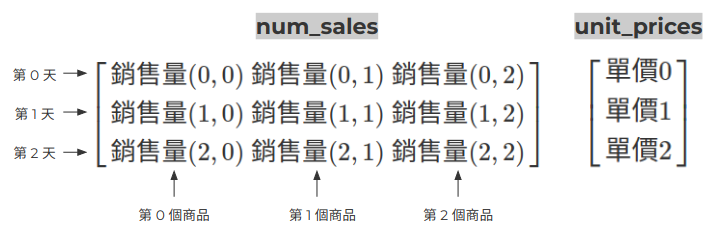

圖二：

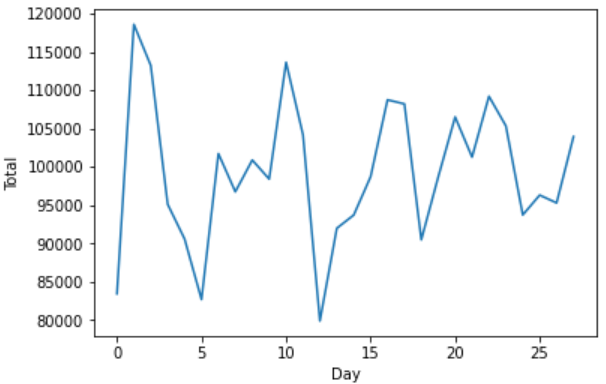

圖三：

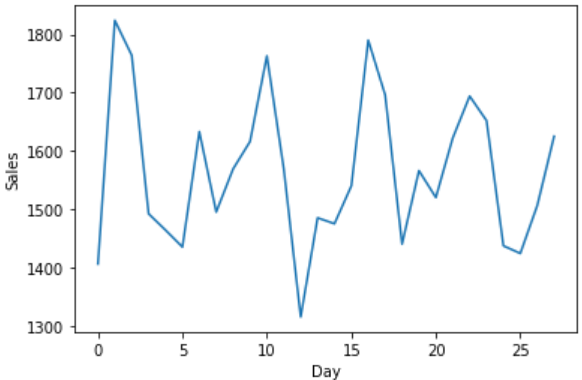

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
unit_prices = np.array([35, 47, 35, 45, 48, 72, 90, 40, 77, 100, 39, 40, 85, 93, 96, 82, 97, 99, 55, 75, 78, 36, 69, 49, 48, 53, 36, 95, 30, 75, 55, 66], dtype=np.int32)
num_sales = np.array([[51, 45, 79, 32, 66, 65, 12, 74, 16, 32, 11, 84, 73, 26, 52, 32, 24, 28, 57, 20, 38, 18, 17, 53, 43, 87, 37, 18, 41, 19, 71, 85], [59, 31, 23, 61, 51, 47, 71, 38, 84, 81, 14, 85, 67, 79, 29, 54, 48, 25, 71, 45, 77, 71, 64, 82, 46, 78, 55, 79, 38, 28, 83, 60], [34, 38, 85, 25, 64, 24, 45, 73, 70, 66, 79, 25, 51, 87, 48, 74, 87, 32, 85, 38, 27, 59, 75, 86, 25, 69, 34, 77, 59, 12, 86, 25], [11, 37, 81, 12, 43, 84, 30, 77, 84, 13, 84, 26, 41, 15, 60, 61, 32, 48, 26, 21, 81, 31, 22, 14, 62, 66, 11, 68, 61, 84, 87, 19], [38, 35, 63, 79, 29, 55, 43, 81, 17, 86, 55, 18, 49, 22, 35, 10, 39, 30, 86, 37, 64, 12, 80, 84, 40, 78, 73, 21, 14, 32, 43, 16], [77, 55, 18, 53, 31, 21, 20, 78, 14, 13, 77, 82, 28, 36, 10, 63, 15, 15, 43, 69, 83, 32, 78, 41, 54, 55, 42, 40, 77, 21, 39, 55], [85, 72, 16, 75, 42, 41, 83, 20, 31, 39, 63, 73, 29, 17, 28, 87, 16, 59, 28, 55, 62, 72, 79, 76, 23, 64, 35, 39, 32, 79, 73, 40], [36, 47, 76, 32, 36, 76, 68, 48, 26, 72, 39, 18, 87, 73, 48, 38, 50, 20, 29, 71, 26, 78, 34, 70, 28, 23, 82, 19, 15, 43, 46, 41], [10, 52, 60, 52, 58, 40, 28, 82, 34, 67, 41, 13, 75, 45, 36, 87, 75, 12, 19, 23, 27, 63, 23, 11, 24, 83, 71, 87, 59, 76, 86, 50], [10, 35, 82, 66, 56, 81, 44, 42, 11, 32, 87, 39, 39, 30, 68, 20, 56, 39, 66, 15, 54, 63, 26, 58, 20, 75, 54, 37, 82, 82, 66, 81], [81, 84, 69, 48, 83, 79, 83, 31, 46, 68, 13, 27, 21, 77, 59, 80, 27, 86, 82, 11, 22, 54, 39, 37, 50, 72, 87, 60, 27, 52, 66, 42], [37, 49, 34, 74, 69, 65, 78, 51, 73, 86, 50, 58, 44, 61, 86, 61, 33, 46, 74, 20, 50, 32, 37, 52, 24, 24, 21, 27, 44, 40, 23, 46], [76, 33, 80, 41, 19, 50, 43, 62, 19, 15, 24, 50, 14, 12, 39, 13, 16, 83, 17, 24, 43, 58, 38, 21, 76, 32, 34, 67, 40, 58, 63, 55], [41, 81, 54, 63, 28, 41, 20, 25, 15, 67, 26, 44, 39, 36, 43, 24, 35, 51, 63, 86, 61, 82, 51, 29, 21, 86, 44, 33, 74, 42, 37, 43], [31, 18, 59, 67, 35, 82, 41, 23, 49, 16, 63, 82, 24, 17, 77, 52, 66, 51, 39, 32, 69, 58, 65, 31, 37, 68, 12, 28, 55, 29, 16, 83], [28, 68, 76, 10, 65, 79, 60, 41, 36, 83, 25, 22, 54, 38, 45, 38, 11, 42, 36, 85, 27, 64, 38, 59, 42, 25, 57, 75, 86, 74, 39, 12], [85, 70, 85, 78, 85, 83, 45, 72, 24, 38, 20, 84, 57, 76, 10, 81, 69, 16, 21, 85, 28, 71, 67, 44, 31, 74, 14, 54, 80, 16, 59, 68], [75, 74, 33, 48, 80, 12, 39, 11, 49, 62, 53, 82, 17, 67, 87, 76, 79, 41, 63, 19, 38, 41, 75, 34, 79, 77, 53, 39, 35, 35, 56, 67], [13, 28, 58, 61, 56, 79, 13, 32, 18, 85, 54, 68, 20, 42, 10, 65, 33, 57, 52, 43, 34, 12, 74, 50, 59, 81, 74, 35, 15, 34, 71, 14], [64, 33, 58, 18, 64, 72, 74, 57, 27, 81, 37, 86, 12, 23, 83, 20, 48, 52, 68, 19, 59, 47, 50, 17, 86, 49, 39, 31, 56, 31, 48, 57], [12, 11, 50, 45, 50, 59, 37, 12, 28, 67, 14, 16, 44, 77, 79, 70, 86, 69, 77, 28, 74, 45, 85, 19, 11, 33, 81, 46, 31, 54, 39, 71], [22, 83, 44, 46, 56, 30, 58, 77, 79, 67, 73, 19, 37, 37, 51, 20, 81, 21, 85, 56, 25, 27, 28, 72, 40, 65, 48, 40, 83, 34, 53, 65], [69, 42, 28, 50, 52, 81, 35, 86, 74, 50, 29, 62, 30, 57, 14, 34, 68, 68, 47, 87, 68, 41, 41, 17, 79, 81, 37, 59, 29, 42, 54, 83], [71, 48, 68, 65, 55, 32, 79, 16, 31, 34, 86, 63, 69, 21, 35, 71, 63, 78, 15, 81, 63, 82, 78, 10, 64, 50, 67, 54, 12, 17, 28, 46], [39, 15, 17, 64, 69, 78, 58, 13, 50, 28, 84, 31, 81, 29, 51, 24, 29, 40, 76, 72, 76, 17, 42, 41, 31, 11, 34, 21, 25, 32, 75, 84], [41, 10, 12, 50, 85, 26, 17, 18, 36, 33, 31, 30, 30, 69, 27, 45, 35, 87, 40, 80, 69, 41, 59, 62, 65, 16, 15, 77, 14, 76, 69, 59], [10, 73, 26, 59, 57, 46, 21, 82, 53, 56, 74, 49, 58, 45, 38, 83, 78, 28, 38, 54, 38, 56, 46, 15, 58, 22, 56, 45, 54, 12, 46, 30], [47, 69, 67, 33, 68, 51, 76, 65, 39, 56, 13, 38, 62, 20, 78, 24, 19, 67, 13, 73, 74, 60, 72, 53, 78, 36, 32, 22, 49, 69, 73, 29]], dtype=np.int32)

In [ ]:
print(unit_prices.shape)

In [ ]:
print(unit_prices)

In [ ]:
print(num_sales.shape)

In [ ]:
print(num_sales)

In [ ]:
#@title 1. 這家店總共有幾種商品？
num_products = unit_prices.shape[0]
print("Number of Products =", num_products) # Expected output: 32

In [ ]:
#@title 2. 該月總共有幾天？
num_days = 0 # PLEASE MODIFY
print("Number of days =", num_days) # Expected output: 28

In [ ]:
#@title 參考解答
num_days = num_sales.shape[0] # PLEASE MODIFY
print("Number of days =", num_days) # Expected output: 28

In [ ]:
#@title 3. 第 2 個商品的單價為多少？
second_product_price = 0 # PLEASE MODIFY
print("The price of second product =", second_product_price) # Expected output: 35

In [ ]:
#@title 參考解答
second_product_price = unit_prices[2] # PLEASE MODIFY
print("The price of second product =", second_product_price) # Expected output: 35

In [ ]:
#@title 4. 如果所有商品各買一個，總共會花多少錢？
price_total = 0 # PLEASE MODIFY
print("The total price of all products =", price_total) # Expected output: 2040

In [ ]:
#@title 參考解答
price_total = unit_prices.sum() # PLEASE MODIFY
print("The total price of all products =", price_total) # Expected output: 2040

In [ ]:
#@title 5. 該月第 2 天總共銷售了幾個商品
second_day_num_sales = 0 # PLEASE MODIFY
print("Number of sales on second day =", second_day_num_sales) # Expected output: 1764

In [ ]:
#@title 參考解答
second_day_num_sales = num_sales[2].sum() # PLEASE MODIFY
print("Number of sales on second day =", second_day_num_sales) # Expected output: 1764

In [ ]:
#@title 6. 該月第 2 天的銷售金額為多少？
second_day_total = 0 # PLEASE MODIFY
print("Sales amount on second day =", second_day_total) # Expected output: 113216

In [ ]:
#@title 參考解答
second_day_total = num_sales[2].dot(unit_prices) # PLEASE MODIFY
print("Sales amount on second day =", second_day_total) # Expected output: 113216

In [ ]:
#@title 7. 該月的總銷售金額為多少？
month_total = 0 # PLEASE MODIFY
print("Total sales amount this month =", month_total) # Expected output: 2781320

In [ ]:
#@title 參考解答
month_total = num_sales.dot(unit_prices).sum() # PLEASE MODIFY
print("Total sales amount this month =", month_total) # Expected output: 2781320

In [ ]:
#@title 8. 畫一張圖表，x 軸為該月的第幾天，y 軸為每天的銷售金額，結果類似圖一

# Plot sale totals everyday.
def plot_totals(days, totals):
    plt.plot(days, totals)
    plt.xlabel("Day")
    plt.ylabel("Total")
    plt.show()

days = np.arange(num_sales.shape[0])
totals = np.zeros(num_sales.shape[0]) # PLEASE MODIFY

plot_totals(days, totals)

In [ ]:
#@title 參考解答

# Plot sale totals everyday.
def plot_totals(days, totals):
    plt.plot(days, totals)
    plt.xlabel("Day")
    plt.ylabel("Total")
    plt.show()

days = np.arange(num_sales.shape[0])
totals = num_sales.dot(unit_prices) # PLEASE MODIFY

plot_totals(days, totals)

In [ ]:
#@title 9. 畫一張圖表，x 軸為該月的第幾天，y 軸為每天的銷售商品總量，結果類似圖二

# Plot sales amount everyday.
def plot_everyday_sales(days, everyday_sales):
    # PLEASE MODIFY CODE BELOW
    pass

days = np.arange(num_sales.shape[0])
everyday_sales = np.zeros(num_sales.shape[0]) # PLEASE MODIFY

plot_everyday_sales(days, everyday_sales)

In [ ]:
#@title 參考解答
import numpy as np
import matplotlib.pyplot as plt

# Plot sales amount everyday.
def plot_everyday_sales(days, everyday_sales):
    # PLEASE MODIFY CODE BELOW
    plt.plot(days, everyday_sales)
    plt.xlabel("Day")
    plt.ylabel("Sales")
    plt.show()

days = np.arange(num_sales.shape[0])
everyday_sales = num_sales.sum(axis=1) # PLEASE MODIFY

plot_everyday_sales(days, everyday_sales)

In [ ]:
#@title 10. 該月第幾天的銷售商品總量最低？
min_sales_day = 0 # PLEASE MODIFY
print("The day with minimum number of sales:", min_sales_day) # Expected output: 12

In [ ]:
#@title 參考解答
min_sales_day = np.argmin(num_sales.sum(axis=1)) # PLEASE MODIFY
print("The day with minimum number of sales:", min_sales_day) # Expected output: 12

In [ ]:
#@title 11. 第 2 個商品的平均一天可以賣幾個？
second_avg_sales = 0 # PLEASE MODIFY
print("Average sales of second product:", second_avg_sales) # Expected output: 53.607142857142854

In [ ]:
#@title 參考解答

# Solution 1
second_avg_sales = num_sales.mean(axis=0)[2] # PLEASE MODIFY
print("Average sales of second product:", second_avg_sales) # Expected output: 53.607142857142854

# Solution 2
second_avg_sales =num_sales[:, 2].mean() # PLEASE MODIFY
print("Average sales of second product:", second_avg_sales) # Expected output: 53.607142857142854

In [ ]:
#@title 12. 承上題，第 2 個商品總共有幾天的商品銷售量大於該商品的平均銷售量？
# PLEASE MODIFY CODE BELOW
days_better_than_avg = 0
print("Number of days that second product better than average:", days_better_than_avg) # Expected output: 17

In [ ]:
#@title 參考解答
# PLEASE MODIFY CODE BELOW
second_num_sales = num_sales[:, 2]
second_avg_sales = second_num_sales.mean()
is_better_than_avg = second_num_sales > second_avg_sales
# Note:
# .astype(int) can beinored since True / False will be treated as 1 / 0
# for numpy.sum()
days_better_than_avg = np.sum(is_better_than_avg.astype(int))
print("Number of days that second product better than average:", days_better_than_avg) # Expected output: 17

In [ ]:
#@title 13. 前 10 天（亦即第 0 到 第 9 天）的第幾個商品的銷售總量排名第二高？
# PLEASE MODIFY CODE BELOW
second_best_product = 0
print("Second best saled product from day 0 to day 9:", second_best_product) # Expected output: 25

In [ ]:
#@title 參考解答
# PLEASE MODIFY CODE BELOW
ten_days_num_sales = num_sales[:10]
product_total_sales = ten_days_num_sales.sum(axis=0)
sorted_indices = product_total_sales.argsort()
second_best_product = sorted_indices[-2]
print("Second best saled product from day 0 to day 9:", second_best_product) # Expected output: 25

# You can also write above code in one line
second_best_product = num_sales[:10].sum(axis=0).argsort()[-2]
print("Second best saled product from day 0 to day 9:", second_best_product) # Expected output: 25